In [1]:
!pip install pandas numpy matplotlib seaborn


In [2]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 500

# Generate synthetic data
data = {
    "Age": np.random.randint(18, 80, size=n_samples),
    "BMI": np.round(np.random.normal(27, 5, size=n_samples), 1),
    "BloodPressure": np.random.randint(90, 180, size=n_samples),
    "GlucoseLevel": np.random.randint(70, 200, size=n_samples),
    "InsulinLevel": np.round(np.random.normal(85, 30, size=n_samples), 1),
    "FamilyHistory": np.random.choice([0, 1], size=n_samples),
    "PhysicalActivity": np.round(np.random.uniform(0, 10, size=n_samples), 1),
    "DietQuality": np.random.randint(1, 6, size=n_samples),
    "SmokingStatus": np.random.choice([0, 1], size=n_samples),
}

# Function to calculate diabetes probability
def calculate_diabetes_probability(row):
    risk_score = (
        0.02 * row['Age'] +
        0.05 * (row['BMI'] - 25) +
        0.03 * (row['BloodPressure'] - 120) +
        0.04 * (row['GlucoseLevel'] - 100) +
        0.02 * (row['InsulinLevel'] - 90) +
        0.10 * row['FamilyHistory'] -
        0.02 * row['PhysicalActivity'] -
        0.05 * row['DietQuality'] +
        0.05 * row['SmokingStatus']
    )
    return 1 if risk_score > 0 else 0

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate 'Diabetes' based on a risk function
df['Diabetes'] = df.apply(calculate_diabetes_probability, axis=1)

# Save to CSV
df.to_csv('synthetic_healthcare_data.csv', index=False)

# Display first few rows of the data
print(df.head())


   Age   BMI  BloodPressure  GlucoseLevel  InsulinLevel  FamilyHistory  \
0   56  32.3            127           114          43.4              1   
1   69  27.3             98           102          62.1              0   
2   46  31.4            142           171          84.7              0   
3   32  32.3            133            80         151.6              0   
4   60  22.2            175           157          64.4              1   

   PhysicalActivity  DietQuality  SmokingStatus  Diabetes  
0               8.2            3              1         1  
1               7.8            5              0         0  
2               5.4            4              0         1  
3               1.0            3              1         1  
4               6.9            3              1         1  


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('synthetic_healthcare_data.csv')

# Display the first few rows
print(df.head())


   Age   BMI  BloodPressure  GlucoseLevel  InsulinLevel  FamilyHistory  \
0   56  32.3            127           114          43.4              1   
1   69  27.3             98           102          62.1              0   
2   46  31.4            142           171          84.7              0   
3   32  32.3            133            80         151.6              0   
4   60  22.2            175           157          64.4              1   

   PhysicalActivity  DietQuality  SmokingStatus  Diabetes  
0               8.2            3              1         1  
1               7.8            5              0         0  
2               5.4            4              0         1  
3               1.0            3              1         1  
4               6.9            3              1         1  


In [4]:
# Summary statistics for all columns
print(df.describe())


              Age         BMI  BloodPressure  GlucoseLevel  InsulinLevel  \
count  500.000000  500.000000     500.000000    500.000000    500.000000   
mean    49.910000   27.146600     134.216000    134.352000     85.397800   
std     18.221909    5.122199      25.745894     38.574448     30.247508   
min     18.000000   13.300000      90.000000     70.000000      0.800000   
25%     35.000000   23.900000     112.750000    102.000000     64.375000   
50%     50.000000   27.100000     134.000000    135.000000     83.900000   
75%     66.000000   30.925000     156.000000    168.000000    107.400000   
max     79.000000   40.900000     179.000000    199.000000    177.600000   

       FamilyHistory  PhysicalActivity  DietQuality  SmokingStatus    Diabetes  
count     500.000000        500.000000   500.000000     500.000000  500.000000  
mean        0.470000          5.153600     3.082000       0.494000    0.908000  
std         0.499599          2.857239     1.416789       0.500465    0.

<Figure size 1000x800 with 0 Axes>

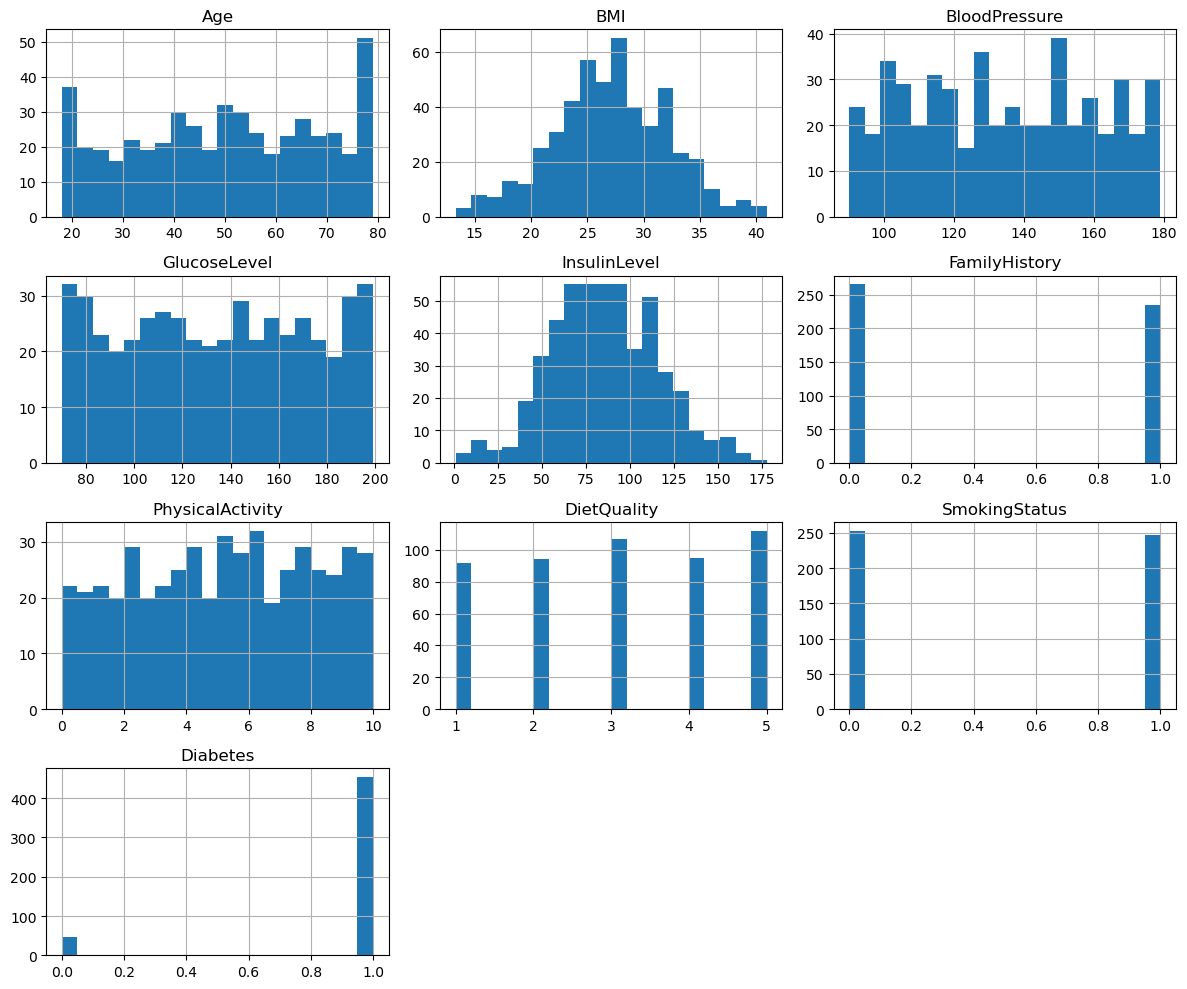

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure size for better visuals
plt.figure(figsize=(10, 8))

# Plot histograms for each feature
df.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

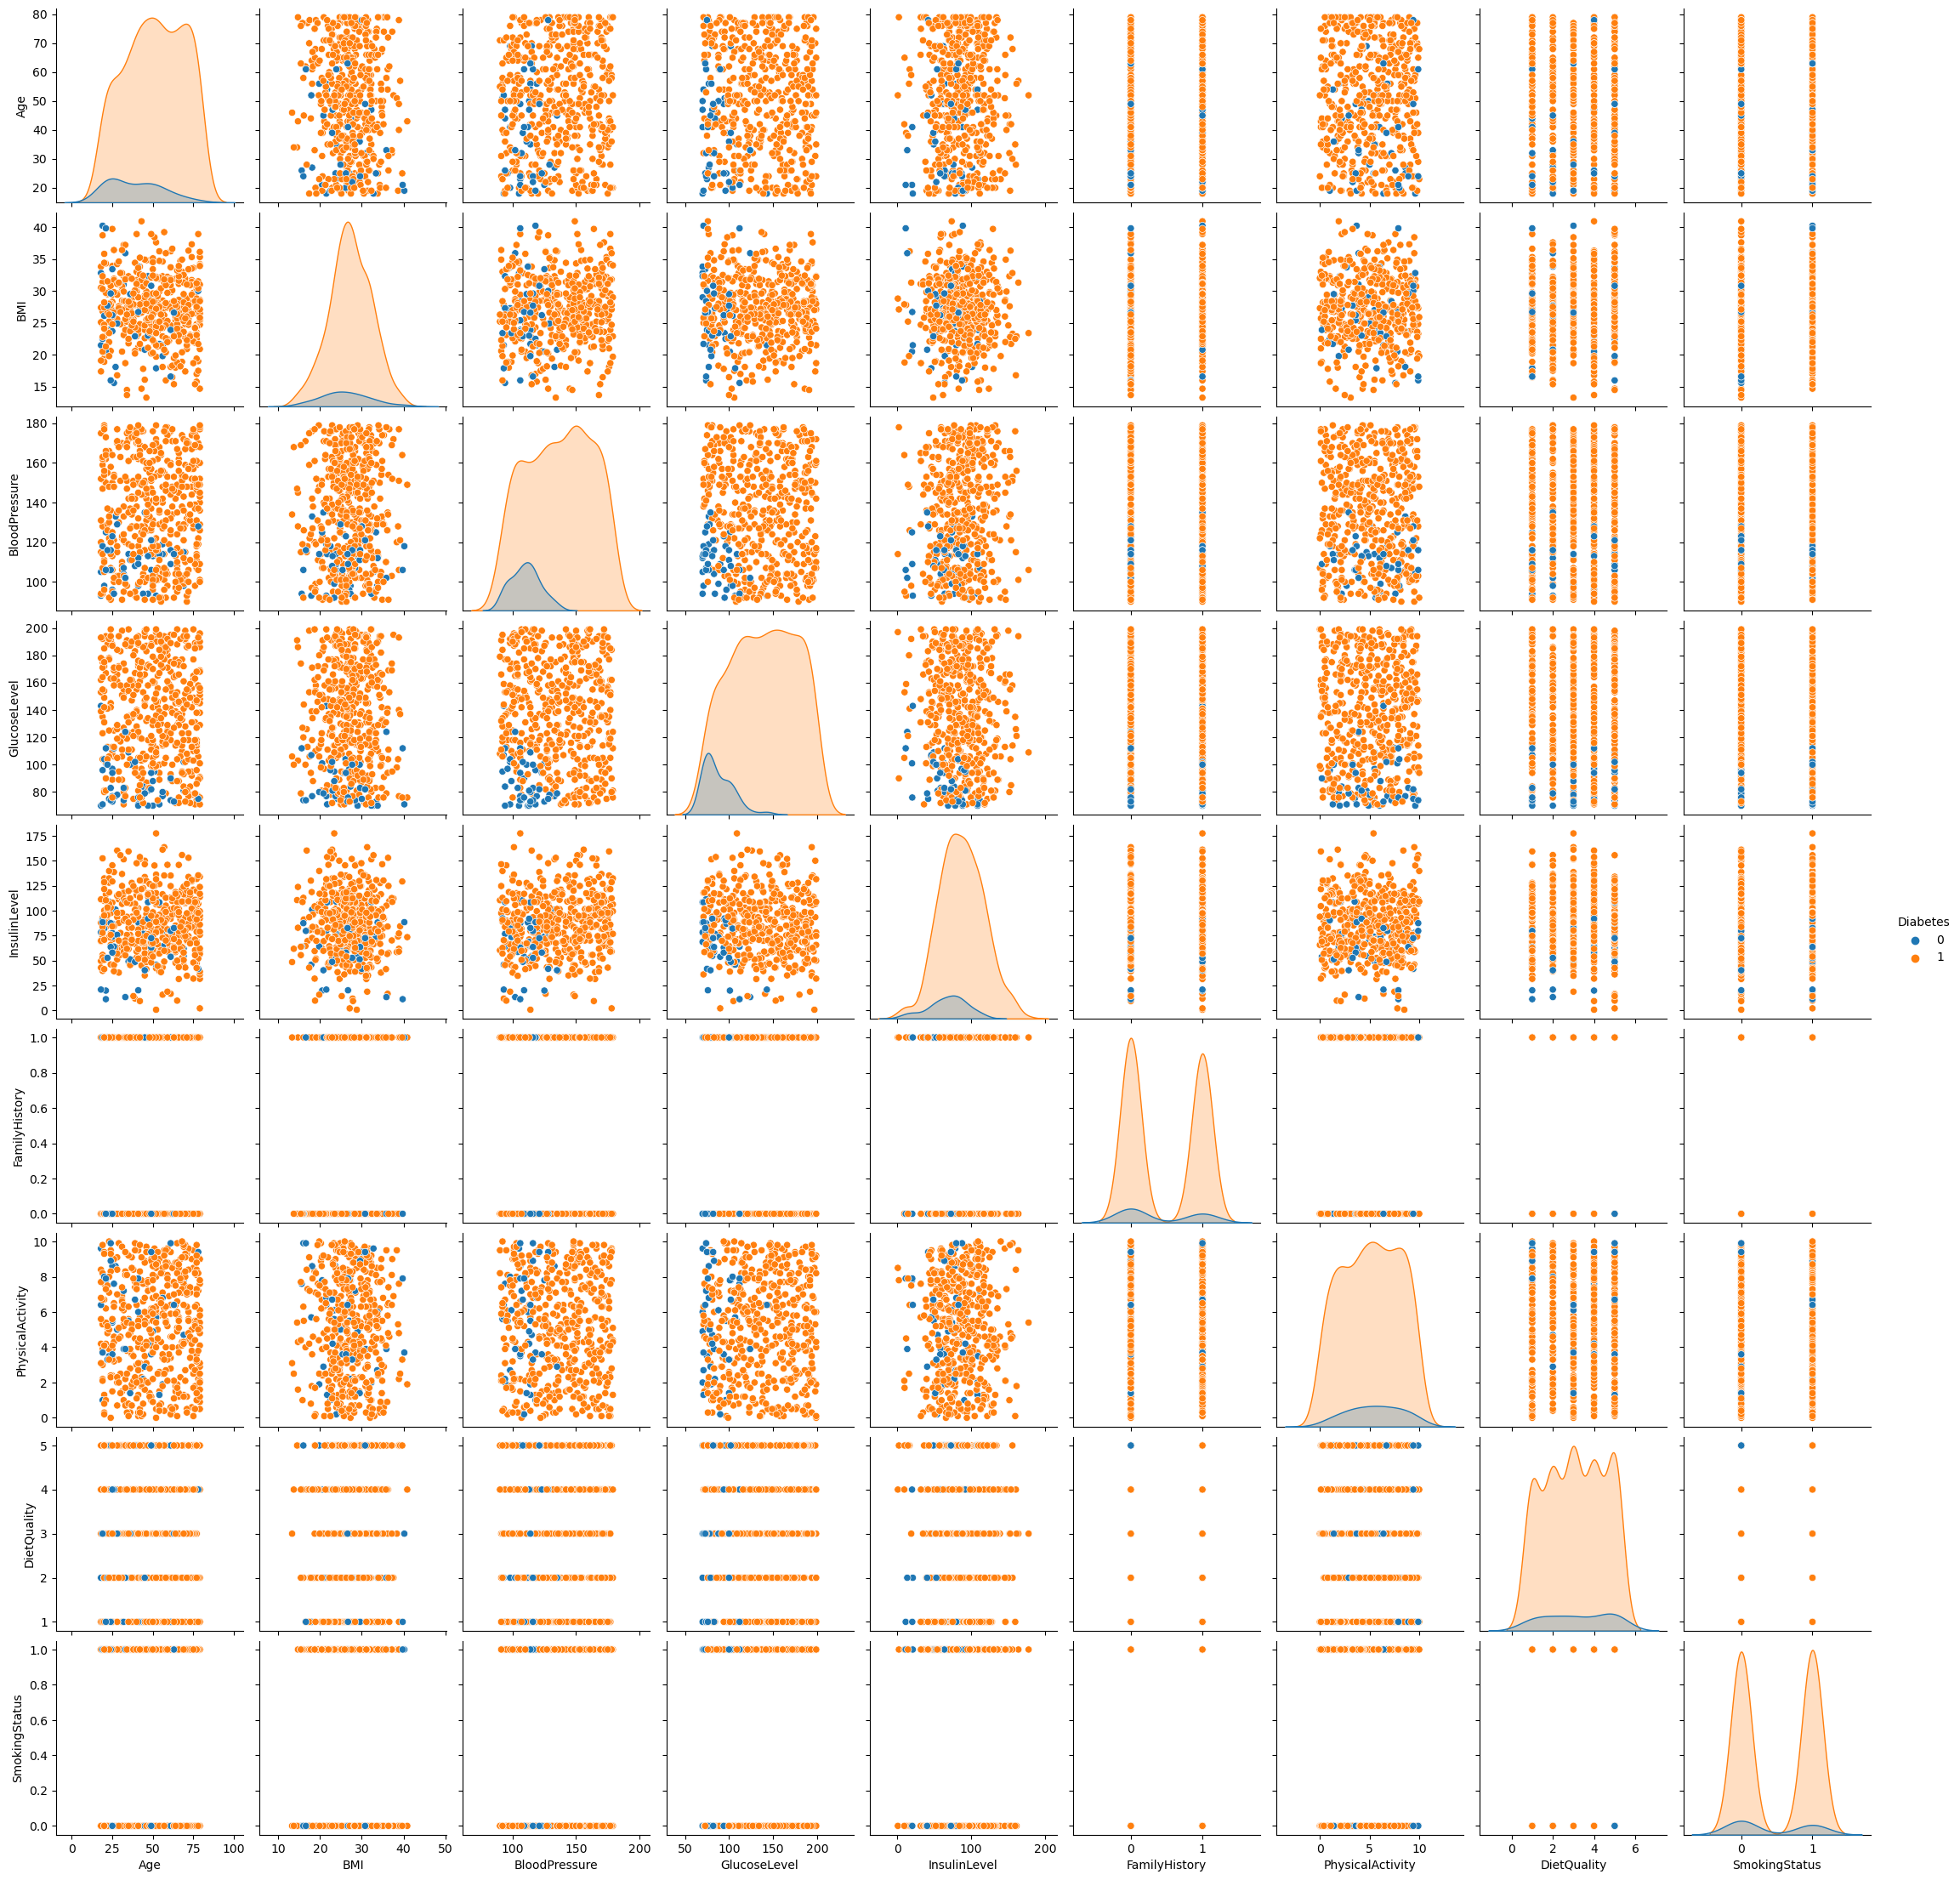

In [6]:
sns.pairplot(df, hue='Diabetes')
plt.show()


In [7]:
# Check for missing values
print(df.isnull().sum())


Age                 0
BMI                 0
BloodPressure       0
GlucoseLevel        0
InsulinLevel        0
FamilyHistory       0
PhysicalActivity    0
DietQuality         0
SmokingStatus       0
Diabetes            0
dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

# Define feature columns and target
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


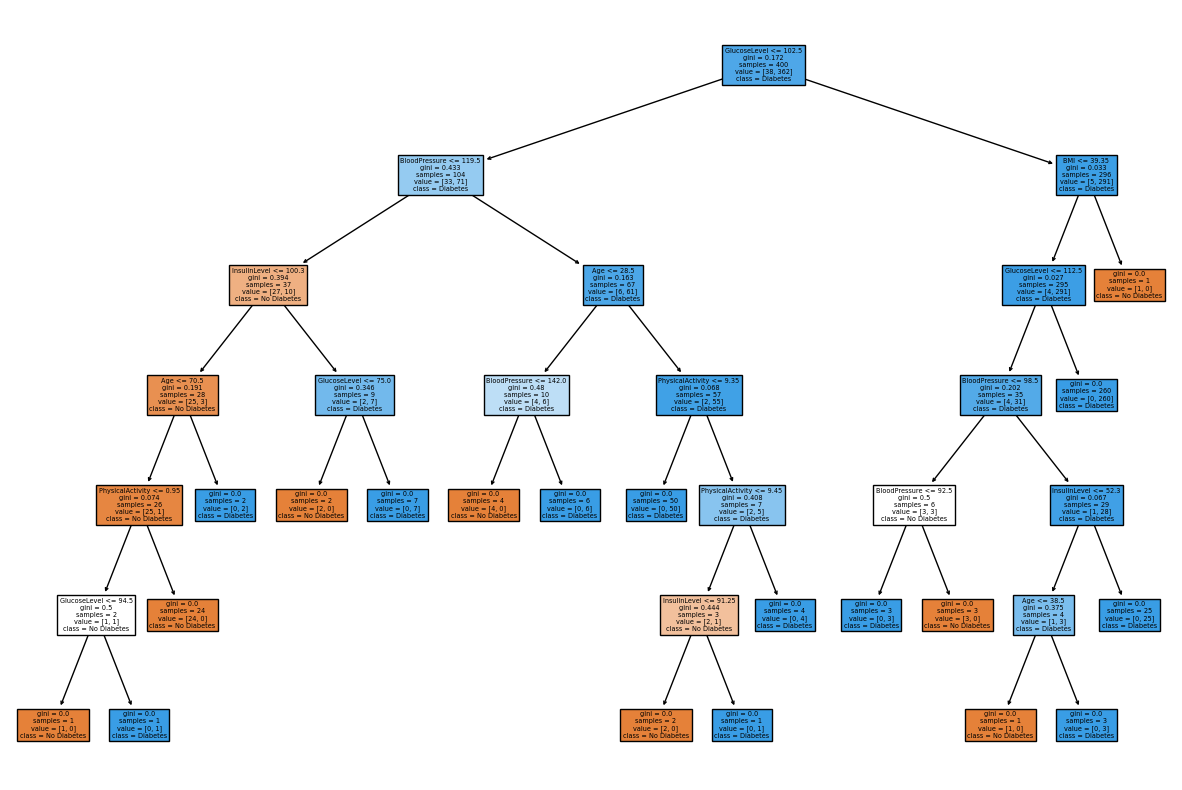

In [10]:
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.95
Precision: 0.97
Recall: 0.98
F1-Score: 0.97
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.97      0.98      0.97        92

    accuracy                           0.95       100
   macro avg       0.84      0.80      0.82       100
weighted avg       0.95      0.95      0.95       100



In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)


In [13]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Precision, Recall, F1-Score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f'Random Forest Precision: {precision_rf:.2f}')
print(f'Random Forest Recall: {recall_rf:.2f}')
print(f'Random Forest F1-Score: {f1_rf:.2f}')

# Classification report
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.95
Random Forest Precision: 0.95
Random Forest Recall: 1.00
Random Forest F1-Score: 0.97
              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.95      1.00      0.97        92

    accuracy                           0.95       100
   macro avg       0.97      0.69      0.76       100
weighted avg       0.95      0.95      0.94       100



In [14]:
# Compare Accuracy
print(f'Decision Tree Accuracy: {accuracy:.2f}')
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Compare Precision, Recall, and F1-Score
print(f'Decision Tree Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')
print(f'Random Forest Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, F1-Score: {f1_rf:.2f}')


Decision Tree Accuracy: 0.95
Random Forest Accuracy: 0.95
Decision Tree Precision: 0.97, Recall: 0.98, F1-Score: 0.97
Random Forest Precision: 0.95, Recall: 1.00, F1-Score: 0.97


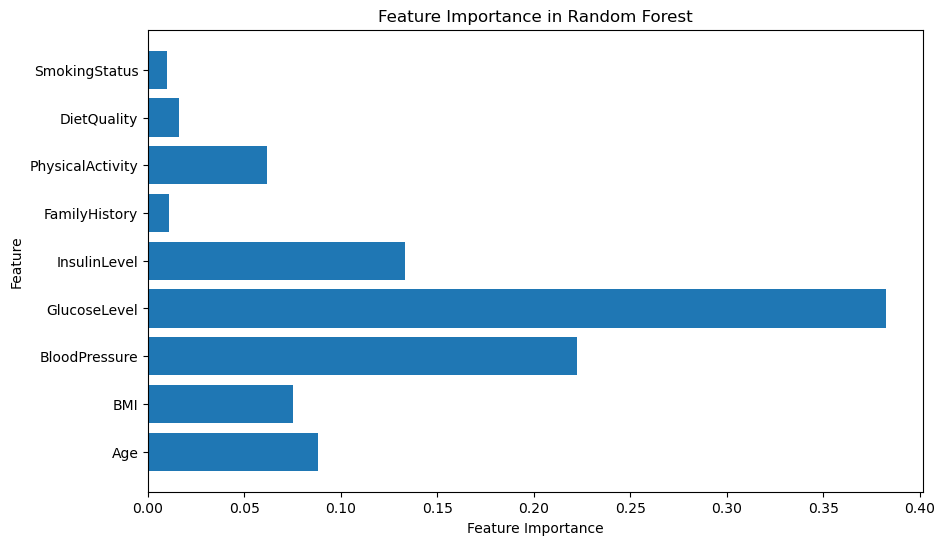

In [15]:
import matplotlib.pyplot as plt

# Feature importance from the random forest
feature_importances = rf_clf.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()
